# Project Name - Airbnb Booking Analysis

##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

This project involves the analysis on the Dataset based on the Airbnb Booking Analysis. This Dataset consists of 48895 rows and 16 unique columns. Airbnb, Inc., based in San Francisco, California, operates an online marketplace focused on short-term homestays and experiences. The company acts as a broker and charges a commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk, and Joe Gebbia. Airbnb means Air Bed and Breakfast. The main objective of this project is revenues and reviews in various neighbourhood groups based on the room type, average price and the avaialability of the listing using various charts and statistical techiques. 

# **GitHub Link -**

https://github.com/AkshayS15/Airbnb-Booking-Analysis-EDA-/blob/main/EDA_Airbnb_Booking_Analysis.ipynb

# **Problem Statement**


**BUSINESS CONTEXT**


Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of date - data that can be analysed and used for security, business decisions, undestanding of customer's and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observation in it with 16 columns and it is a mix of categorical andd numeric values. Explore and analyse the data to discover key understandings.

#### **Define Your Business Objective?**   
Understanding the Customer and Hosts behaviour.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math 

### Dataset Loading

In [2]:
#Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Projects/EDA/Airbnb NYC 2019.csv')

### Dataset First View

In [3]:
# Viewing First 5 records of the Dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [4]:
# Dataset Columns and rows
df.shape

(48895, 16)

There are 48895 rows while 16 unique columns are available in data

### Dataset Information

In [5]:
#Dataset Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


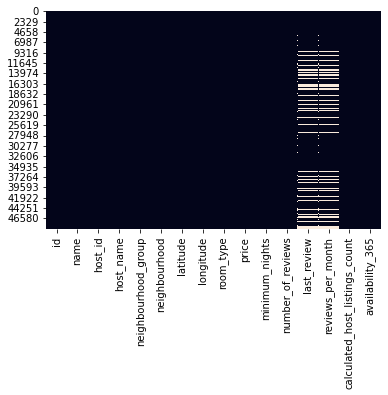

In [8]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

This dataset is given by Airbnb team, This data file includes all needed information to find out more about hosts, geographical
availability, necessary metrics to find insights and draw conclusions.


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Variables Description 

**id** - unique id  
**name** - Name of the listing  
**host_id** - Unique host id  
**host_name** - Name of the Host  
**neighbourhood_group** - location  
**neighbourhood** - area  
**latitude** - Latitude Range  
**longitude** - Longitude Range   
**room_type** - Type of listings  
**price** - Price of listing  
**minimum_nights** - Minimum nights to be paid for   
**number_of_reviews** - Number of reviews    
**last_review** - Content of last review  
**reviews_per_month** - number of checks per month   
**calculated_host_listing_counts** - Total Counts  
availability_365 - Availability around the year   

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  id is 48895
No. of unique values in  name is 47905
No. of unique values in  host_id is 37457
No. of unique values in  host_name is 11452
No. of unique values in  neighbourhood_group is 5
No. of unique values in  neighbourhood is 221
No. of unique values in  latitude is 19048
No. of unique values in  longitude is 14718
No. of unique values in  room_type is 3
No. of unique values in  price is 674
No. of unique values in  minimum_nights is 109
No. of unique values in  number_of_reviews is 394
No. of unique values in  last_review is 1764
No. of unique values in  reviews_per_month is 937
No. of unique values in  calculated_host_listings_count is 47
No. of unique values in  availability_365 is 366


## 3. ***Data Wrangling***

#### Handling the Missing values  

In [12]:
# Filling null values in reviews_per_month column as 0
df.fillna({'reviews_per_month':0},inplace=True)

In [13]:
# Filling null values in last_review column as "-"
df.fillna({'last_review': "-"},inplace = True)

## 3. ***Data Insights***

#### Finding Total Hosts  

In [45]:
# Finding Total Hosts
total_hosts = len(df['host_id'].unique())
print(f'There are total {total_hosts} available')

There are total 37457 available


#### Finding Unique Neighbourhood Groups  

In [14]:
# Finding unique neighbourhood groups 

groups = df['neighbourhood_group'].unique()
numbers = len(df['neighbourhood_group'].unique())
print(f'There are {numbers} unique neighbourhood groups which are {groups}')

There are 5 unique neighbourhood groups which are ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


#### Finding unique neighbourhoods 





In [15]:
# Finding unique neighbourhoods 
neighbourhoods =  df['neighbourhood'].unique()
neigh_num = len(df['neighbourhood'].unique())
print(f'There are {neigh_num} unique neighbourhood groups which are {neighbourhoods}')

There are 221 unique neighbourhood groups which are ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges' 'Queens Village' 'Rockaway Beach' 'Fores

#### Finding all room types





In [16]:
# Finding all room types 
types = df['room_type'].unique()
type_num = len(df['room_type'].unique())
print(f'There are {type_num} room type which are {types}')

There are 3 room type which are ['Private room' 'Entire home/apt' 'Shared room']


In [17]:
# Function to get the average price of each neighbourhood group

def avg_price(df,neighbourhood_grp) :
  ''' This function will help us to get the average listing price''' 
  try :
    avg = round(df[df['neighbourhood_group'] == neighbourhood_grp]['price'].mean(),2)
    return avg
  except :
    'Invalid Information'

#### Finding the average listing price in each neighbourhood group





In [18]:
# Finding the average listing price in Brooklyn
avg_price(df,'Brooklyn')

124.38

In [19]:
# Finding the average listing price in Manhattan
avg_price(df,'Manhattan')

196.88

In [20]:
# Finding the average listing price in Queens
avg_price(df,'Queens')

99.52

In [21]:
# Finding the average listing price in Staten Island
avg_price(df,'Staten Island')

114.81

In [22]:
# Finding the average listing price in Bronx
avg_price(df,'Bronx')


87.5

According to our analysis the average booking price is highest in Manhattan which is 196.88 dollars whereas Bronx has the lowest average booking price which is 87.5 dollars.

In [23]:
# Finding average price in each neighbourhood group according to room type 

pd.DataFrame(round(df.groupby(['neighbourhood_group','room_type'])['price'].mean(),2))

price
neighbourhood_group room_type              
Bronx               Entire home/apt  127.51
                    Private room      66.79
                    Shared room       59.80
Brooklyn            Entire home/apt  178.33
                    Private room      76.50
                    Shared room       50.53
Manhattan           Entire home/apt  249.24
                    Private room     116.78
                    Shared room       88.98
Queens              Entire home/apt  147.05
                    Private room      71.76
                    Shared room       69.02
Staten Island       Entire home/apt  173.85
                    Private room      62.29
                    Shared room       57.44

Here, we can see, 
- Manhattan has the highest average price  as 249.24 dollars and Bronx has the least average price 127.51 dollars for "Entire Home/ apt".
- Manhattan has the highest average price  as 116.78 dollars and Staten Island has the least average price 127.51 dollars for "Private Room".
- Manhattan has the highest average price  as 88.98 dollars and Brooklyn has the least average price 50.53 dollars for "Shared Room"

In [24]:
# Total listings in each neighbourhood group

pd.DataFrame(df.groupby(['neighbourhood_group'])['host_id'].count())

,host_id
neighbourhood_group,
Bronx,1091
Brooklyn,20104
Manhattan,21661
Queens,5666
Staten Island,373


- According to this analysis, Manhattan has the highest numbers of listings as 21661 from total neighbourhood groups while Staten Island has the lowest number of listings as 373.

In [25]:
# Total listings in each neighbourhood group according to room type.

pd.DataFrame(round(df.groupby(['neighbourhood_group','room_type'])['host_id'].count(),2))

host_id
neighbourhood_group room_type               
Bronx               Entire home/apt      379
                    Private room         652
                    Shared room           60
Brooklyn            Entire home/apt     9559
                    Private room       10132
                    Shared room          413
Manhattan           Entire home/apt    13199
                    Private room        7982
                    Shared room          480
Queens              Entire home/apt     2096
                    Private room        3372
                    Shared room          198
Staten Island       Entire home/apt      176
                    Private room         188
                    Shared room            9

- This analysis is helping us to find the total listings in each neighbourhood group according to the room types which are "Shared Room", "Entire Home / apt" and "Private Room". 
- Manhattan has the highest number of listings as 13199 and Staten Island has least number of listings as 176 for the "Entire Home/apt" room type.
- Brooklyn has the highest number of listings as 10132 and Staten Island has least number of listings as 188 for the "Private Room" room type.
- Manhattan has the highest number of listings as 480 and Staten Island has least number of listings as 9 for the "Shared Room" room type.

In [26]:
# Average availability in each group according to room_type

pd.DataFrame(round(df.groupby(['neighbourhood_group','room_type'])['availability_365'].mean()))

availability_365
neighbourhood_group room_type                        
Bronx               Entire home/apt             158.0
                    Private room                171.0
                    Shared room                 154.0
Brooklyn            Entire home/apt              97.0
                    Private room                100.0
                    Shared room                 178.0
Manhattan           Entire home/apt             117.0
                    Private room                102.0
                    Shared room                 139.0
Queens              Entire home/apt             132.0
                    Private room                149.0
                    Shared room                 192.0
Staten Island       Entire home/apt             178.0
                    Private room                226.0
                    Shared room                  65.0

**After Analysing about the average availability of listings in each neighbourhood group according to each room type we can find following things.**  
- Highest avaialabilty for "Entire Home/apt" : Staten Island (178 Days)
- Least avaialabilty for "Entire Home/apt" : Brooklyn (97 Days)
- Highest avaialabilty for "Private Room" : Staten Island (226 Days)
- Least avaialabilty for "Private Room" : Brooklyn (100 Days)  
- Highest avaialabilty for "Shared Room" : Queens (192 Days)
- Least avaialabilty for "Shared Room" : Brooklyn (65 Days)

In [27]:
# Total reviews in each group according to room_type

pd.DataFrame(round(df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].sum(),2))

number_of_reviews
neighbourhood_group room_type                         
Bronx               Entire home/apt              11627
                    Private room                 16312
                    Shared room                    432
Brooklyn            Entire home/apt             267128
                    Private room                213653
                    Shared room                   5793
Manhattan           Entire home/apt             235147
                    Private room                209150
                    Shared room                  10272
Queens              Entire home/apt              60644
                    Private room                 93561
                    Shared room                   2745
Staten Island       Entire home/apt               5857
                    Private room                  5670
                    Shared room                     14

**From above analysis we can get following insights --**
- Brooklyn has the highest number of reviews(267128) and Staten Island has lowest number of reviews(5857) for "Entire Home/apt" room type.
- Brooklyn has the highest number of reviews(213653) and Staten Island has lowest number of reviews(5670) for "Private Room" room type.
- Manhattan has the highest number of reviews(10272) and Staten Island has lowest number of reviews(14) for "Shared Room" room type.

In [28]:
# Average checks per month in each neighbourhood according to room type 

pd.DataFrame(round(df.groupby(['neighbourhood_group','room_type'])['reviews_per_month'].mean(),2))

reviews_per_month
neighbourhood_group room_type                         
Bronx               Entire home/apt               1.82
                    Private room                  1.32
                    Shared room                   0.97
Brooklyn            Entire home/apt               1.13
                    Private room                  0.99
                    Shared room                   0.75
Manhattan           Entire home/apt               0.86
                    Private room                  1.15
                    Shared room                   1.33
Queens              Entire home/apt               1.64
                    Private room                  1.55
                    Shared room                   1.17
Staten Island       Entire home/apt               1.77
                    Private room                  1.44
                    Shared room                   0.74

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Scatter Plot to show the neighbourhood group based on Latitude and Longitude

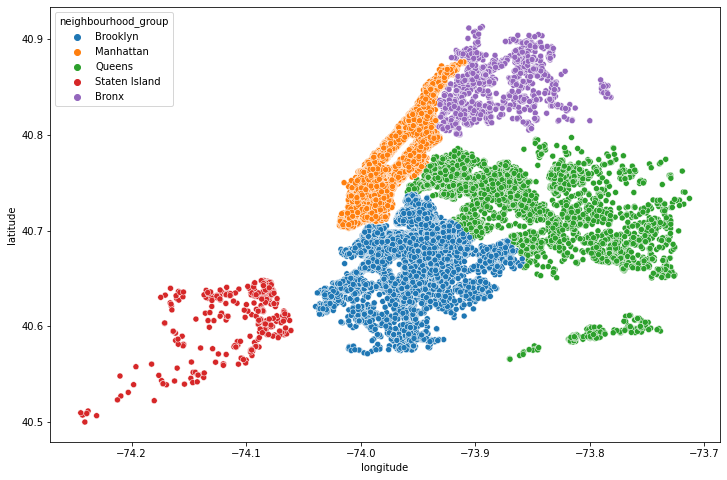

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots' primary uses are to observe and show relationships between two numeric variables. The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole. Identification of correlational relationships are common with scatter plots.

##### 2. What is/are the insight(s) found from the chart?

By looking at the chart we can see the the listings of staten island are quite spreaded.
While the by Looking at the distributtion in Manhattan we can find that the listings are quite closely located and also overlapping each other. Hence the density of listings is is high is Manhattan.
Queens has the highest area covered under it's listings. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If we look at the Staten Island distribution, we can tell that there is a scope of improvement regarding the number of listings/hosts 
 and can take relative actions to improve customer attraction. 

#### Chart - 2 - Room Types and Neighbourhood Group

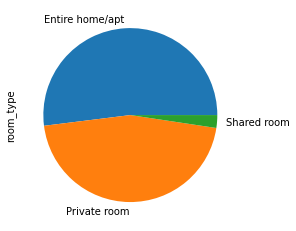

In [30]:
df['room_type'].value_counts().plot(kind='pie')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the churn percentage account length wise.

##### 2. What is/are the insight(s) found from the chart?

By looking at the chart it's clear that more than 50% of the listings are under "Entire Home/apt" Room type.  
And numbers of "Shared Rooms" are very less.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As there are very less number of Shared Rooms available it can negatively impact the business as Shared rooms comparitively has less prices so the tourists whose budget is less they will prefer Shared rooms over Entire Apartment.   
So due to lesser availability of Shared rooms most of the low budget tourists might get disappointed.


#### Chart - 3 - Listings in each Neighbourhood Group

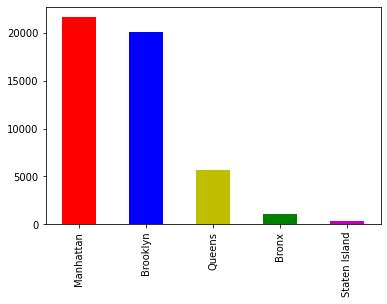

In [31]:
df['neighbourhood_group'].value_counts().plot(kind='bar',color=['r','b','y','g','m'])
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

From the above it looks like Manhattan and Brooklyn has more number of listing that the Queens,Bronx and Staten island.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Tourists living in Queens, Bronx and Staten Island will have less choices while choosing the hotels which is going to impact negatively on the business.

#### Chart - 4 - Average Price for rooms in neighbourhood group

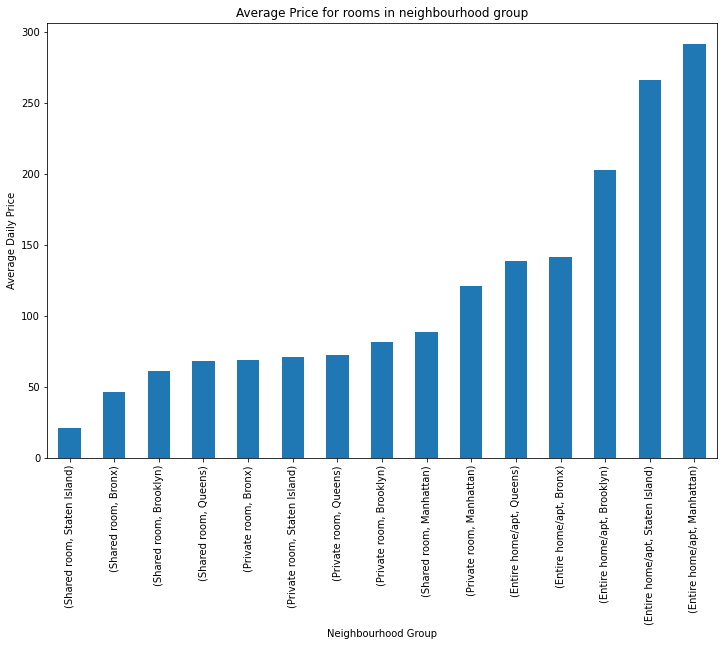

List of Average Price per night based on the neighbourhood group


In [32]:
df.head()
plt.figure(figsize=(12,8))
df1 = df[df['minimum_nights']==1]
df2 = df1.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df2.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood group')


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

- Shared room at staten Island is the most cheapest stay per night whereas Renting a Entire apartment/Home at Manhattan per night is the most expensive.

- Average price for Private room is also considerably expensive at manhattan so is the shared room at Manhattan is expensive than other private rooms of the neighbourhood. This clearly states that Manhattan is the expensive stay than any other locality.

- Bronx is the most cheapest stay in terms of neighbourhood group comparison in respect to room type.

- Though Shared room at Staten Island is the cheapest whereas Apartment renting is not cheapest at Staten Island. This can be due to the location of a perfect gateway from the rush of the city for a quality time with family get together.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 5 - Plot Price based on the Availability 365

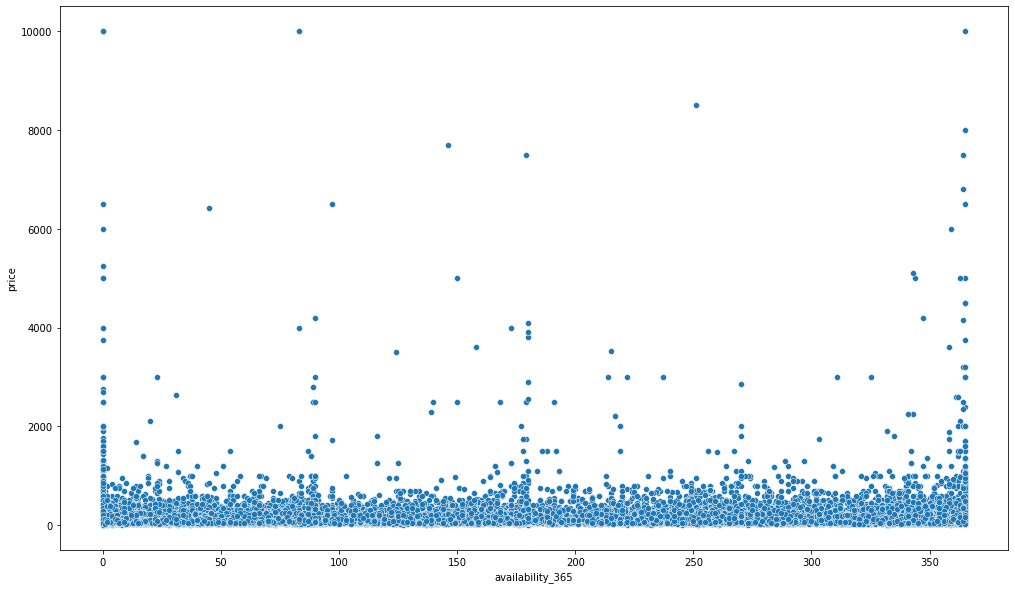

In [33]:
plt.figure(figsize=(17,10))
sns.scatterplot(y=df['price'],x=df['availability_365'])

##### 1. Why did you pick the specific chart?

Scatter plots' primary uses are to observe and show relationships between two numeric variables. The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole. Identification of correlational relationships are common with scatter plots.

##### 2. What is/are the insight(s) found from the chart?

Here it looks like with availability with 365 the price increases to 10K.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Increase in listing price results in less number  of bookings. 

#### Chart - 6 - Top 20 most expensive locality in Airbnb listing

Top 20 most expensive locality in Airbnb listing are :


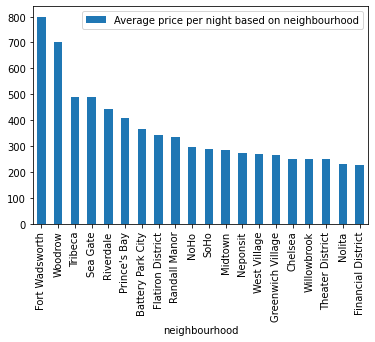

In [34]:
print('Top 20 most expensive locality in Airbnb listing are :')
df3 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",ascending=False).rename(
    index=str, columns={"price": "Average price per night based on neighbourhood"}).head(20)

df3.plot(kind='bar')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

Here we can see, Fort Wadsworth is the most expensive place to stay with average price of 800 dollars , followed by second highest Woodrow withe average price of 700 dollars.  
While at number 3 there is Tribeca with average price of 490.63 dollars. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

After finding the most expansive listings we can get the idea of which neighbourhood can give us more income than others. 

#### Chart - 7 - Top 20 least expensive locality in Airbnb listing

Top 20 most expensive locality in Airbnb listing are :


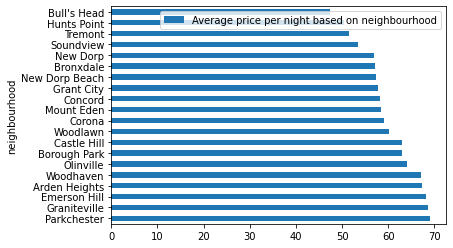

In [35]:
print('Top 20 most expensive locality in Airbnb listing are :')
df4 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",ascending=False).rename(
    index=str, columns={"price": "Average price per night based on neighbourhood"}).tail(20)

df4.plot(kind='barh')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

Here we can see, Bull's Head is the least expensive place to stay with average price of 47.33 dollars , followed by second lowest Hunts Point withe average price of 50.50 dollars.  
While at number 3 there is Tremont with average price of 51.54 dollars. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

After finding the least expansive listings we can get the idea of which neighbourhood can give us lesser income than others. 

#### Chart - 8 - Most numbers of listings in localities

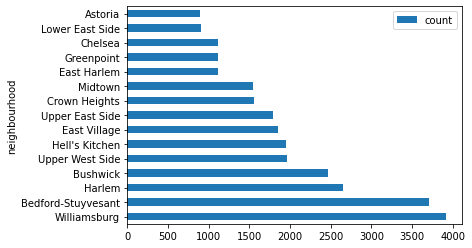

In [36]:
df5 = df.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count'])['host_name'].sort_values(
    by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.head(15).plot(kind='barh')
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

By Looking at the chart, we can get the idea that Wiiialmsburg has the highest number of listings(3919) followed by Bedford-Stuyvesant (3714) and at the third position we have Harlem(2656).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Neighbourhoods having highest number of listings will give us the highest business.  

#### Chart - 9 - Least numbers of listings in localities

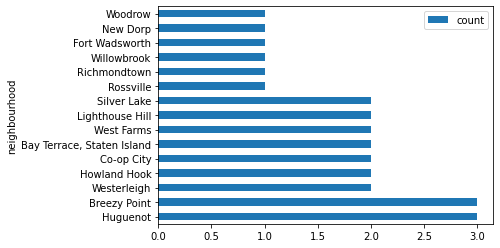

In [37]:
df6 = df.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count'])['host_name'].sort_values(
    by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df6.tail(15).plot(kind='barh')
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

By Looking at the chart, we can get the idea that Woodrow, New Dorp, Fort Wadsworth have least number of listings, which can be also the reason behind them appearing at the most expensive neighburhoods.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Neighbourhoods having lowest number of listings will give us the lowest business.  

#### Chart - 10 - Total reviews in each group according to room_type

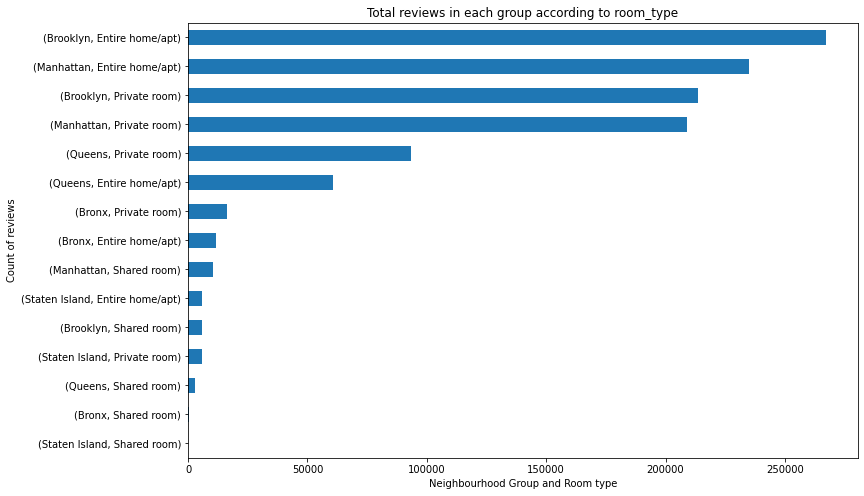

In [42]:
plt.figure(figsize = (12,8))
df7 = df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].sum().sort_values(ascending = True)
df7.plot(kind = 'barh')
plt.title('Total reviews in each group according to room_type')
plt.ylabel('Count of reviews')
plt.xlabel('Neighbourhood Group and Room type')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

**From above analysis we can get following insights --**
- Brooklyn has the highest number of reviews(267128) and Staten Island has lowest number of reviews(5857) for "Entire Home/apt" room type.
- Brooklyn has the highest number of reviews(213653) and Staten Island has lowest number of reviews(5670) for "Private Room" room type.
- Manhattan has the highest number of reviews(10272) and Staten Island has lowest number of reviews(14) for "Shared Room" room type.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There should be more awarenes near the State Island neighbourhoods regading the reviews. As more number of reviews will help us to get the idea about improvement regarding services and which will ultimately helps us to grow the business.

# **Conclusion**

- There are 37457 hosts available within 5 different neighbourhood groups. 
- Within this 5 neighbourhood groups there are 221 neighbourhoods are present. 
- Neighbourhood having least number of listings are also the most expensive ones so we can say that the density of the listings affects the price very much. 
- We can focus on increasing the number of shared rooms as the average price is quite less compared to other two room types and the tourist with lesser budgets can easily afford the Shared rooms.
- Brooklyn and Manhattan are the most popular neighbourhood groups according to the number of reviews.
- State Island needs lots of improvement in all aspects such as number of listings, review awareness,etc.